In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [16]:
# Load the dataset
df = pd.read_csv('exchange_rate.csv')

In [17]:

# Check the column names
print(df.columns)


Index(['date', 'Ex_rate'], dtype='object')


In [18]:
# Set the 'date' column as the index
df.set_index('date', inplace=True)

In [19]:
print(df.index)
print(df.columns)


Index(['01-01-1990 00:00', '02-01-1990 00:00', '03-01-1990 00:00',
       '04-01-1990 00:00', '05-01-1990 00:00', '06-01-1990 00:00',
       '07-01-1990 00:00', '08-01-1990 00:00', '09-01-1990 00:00',
       '10-01-1990 00:00',
       ...
       '01-10-2010 00:00', '02-10-2010 00:00', '03-10-2010 00:00',
       '04-10-2010 00:00', '05-10-2010 00:00', '06-10-2010 00:00',
       '07-10-2010 00:00', '08-10-2010 00:00', '09-10-2010 00:00',
       '10-10-2010 00:00'],
      dtype='object', name='date', length=7588)
Index(['Ex_rate'], dtype='object')


In [20]:
print(df.head())


                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


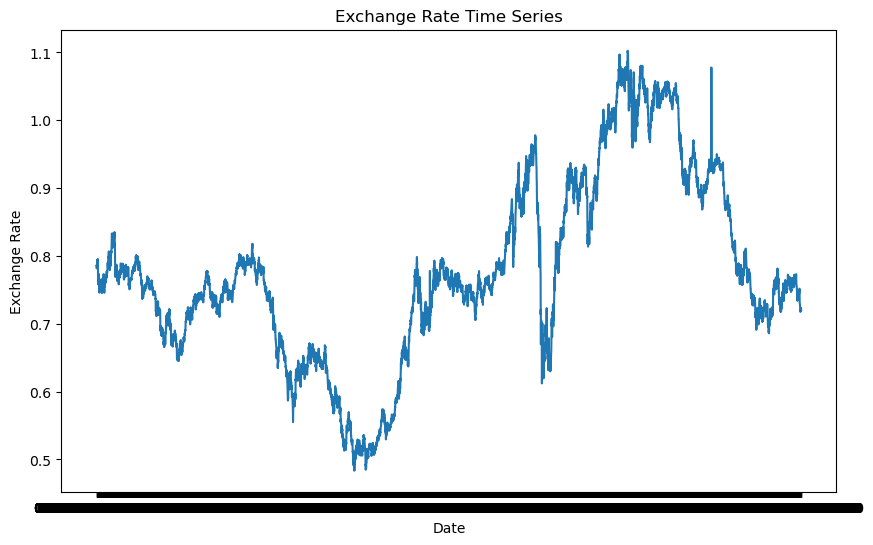

In [21]:
# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

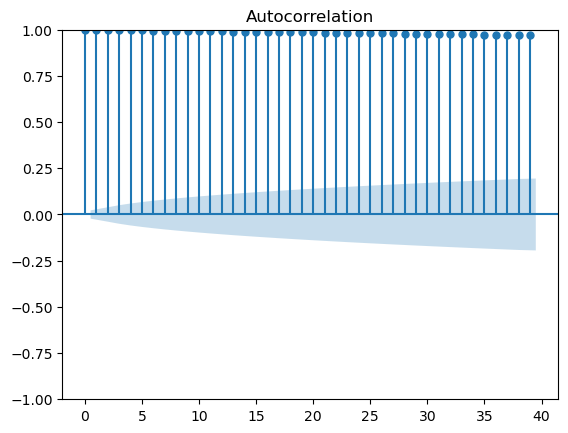

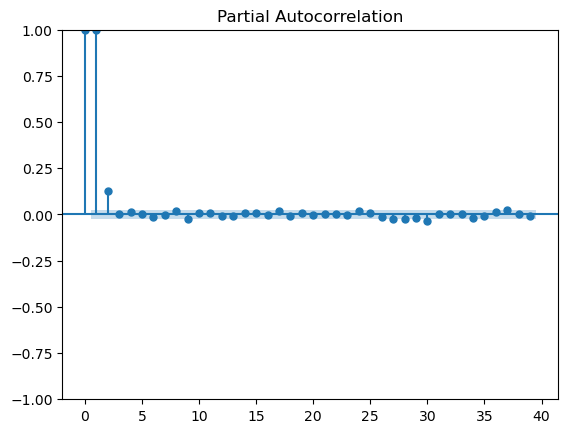

In [26]:
# Handle missing values
df.ffill(inplace=True)


# Plot ACF and PACF
plot_acf(df)
plt.show()
plot_pacf(df)
plt.show()

In [28]:
# Select ARIMA parameters
p = 1
d = 1
q = 1

print("Selected ARIMA parameters:")
print("p =", p)
print("d =", d)
print("q =", q)


Selected ARIMA parameters:
p = 1
d = 1
q = 1


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


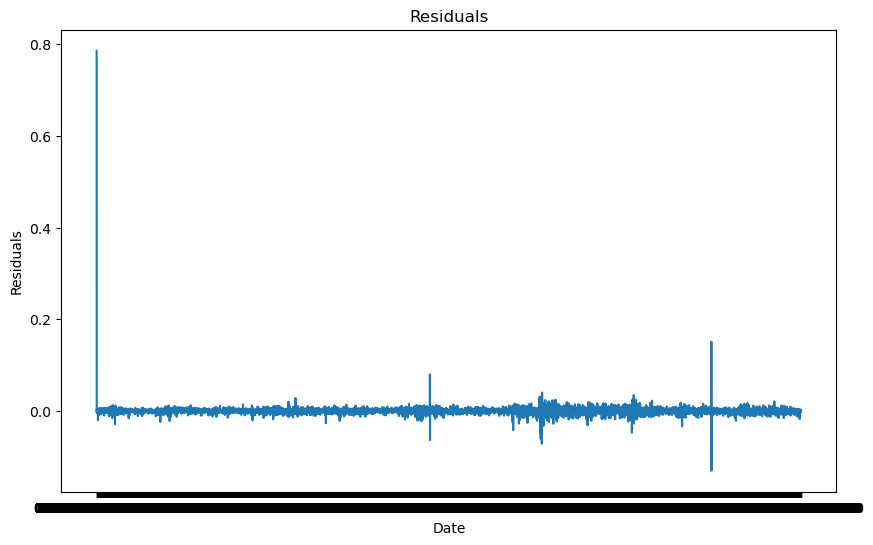

In [29]:
# Fit ARIMA model
model = ARIMA(df, order=(p,d,q))
results = model.fit()

# Plot residuals
residuals = pd.DataFrame(results.resid)
plt.figure(figsize=(10,6))
plt.plot(residuals.index, residuals.values)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


In [30]:
# Reset the index
df.reset_index(drop=True, inplace=True)

# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(p,d,q))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 23 Jan 2025   AIC                         -56102.322
Time:                        04:57:07   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64


TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'

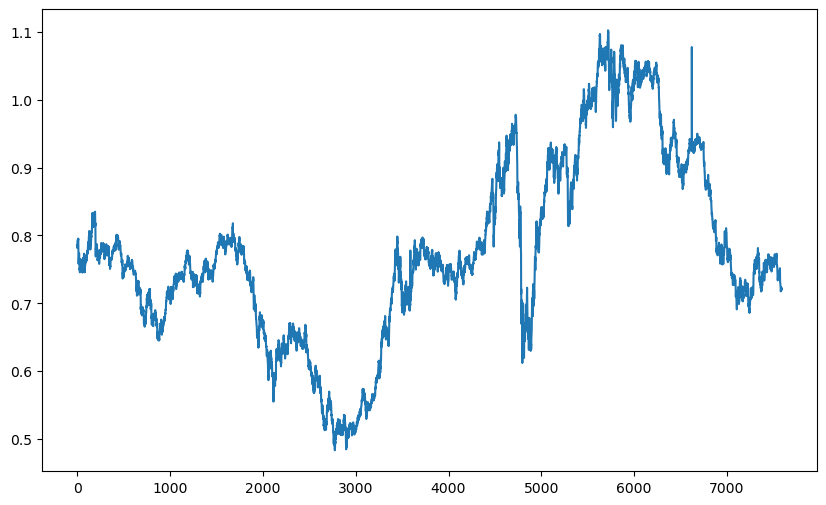

In [33]:
# Forecast using ARIMA
forecast_steps = 30
forecast_result = results.forecast(steps=forecast_steps)

# Print the forecast result
print(forecast_result)

# Plot forecast
plt.figure(figsize=(10,6))
plt.plot(df, label='Actual')
plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=forecast_steps), forecast_result[0], label='Forecast', linestyle='--')
plt.fill_between(pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=forecast_steps), forecast_result[2][:,0], forecast_result[2][:,1], alpha=0.2)
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()



In [39]:
# Select Exponential Smoothing model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit Simple Exponential Smoothing model
ses_model = SimpleExpSmoothing(df)
ses_results = ses_model.fit()

# Print the summary of the model
print(ses_results.summary())


                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:             SimpleExpSmoothing   SSE                              0.273
Optimized:                       True   AIC                         -77644.968
Trend:                           None   BIC                         -77631.099
Seasonal:                        None   AICC                        -77644.963
Seasonal Periods:                None   Date:                 Thu, 23 Jan 2025
Box-Cox:                        False   Time:                         05:02:42
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8683721                alpha                 True
initial_level              0.7855000                

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


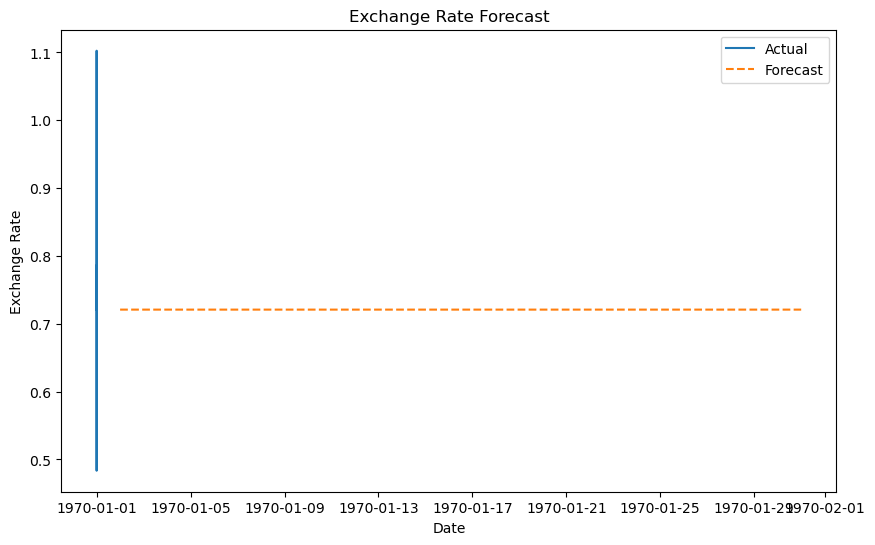

In [41]:

# Plot forecast
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=forecast_steps), forecast, label='Forecast', linestyle='--')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [44]:
# Evaluate models
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast))
arima_mape = mean_absolute_percentage_error(df['Ex_rate'][-forecast_steps:], forecast)
es_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast)
es_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast))
es_mape = mean_absolute_percentage_error(df['Ex_rate'][-forecast_steps:], forecast)

print('ARIMA Metrics:')
print('MAE:', arima_mae)
print('RMSE:', arima_rmse)
print('MAPE:', arima_mape)

print('Exponential Smoothing Metrics:')
print('MAE:', es_mae)
print('RMSE:', es_rmse)
print('MAPE:', es_mape)

ARIMA Metrics:
MAE: 0.01272400648930223
RMSE: 0.01698271091275075
MAPE: 0.017119209757075995
Exponential Smoothing Metrics:
MAE: 0.01272400648930223
RMSE: 0.01698271091275075
MAPE: 0.017119209757075995
